<a href="https://colab.research.google.com/github/Kyocera1303/Python_HW_2/blob/main/HomeWork2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

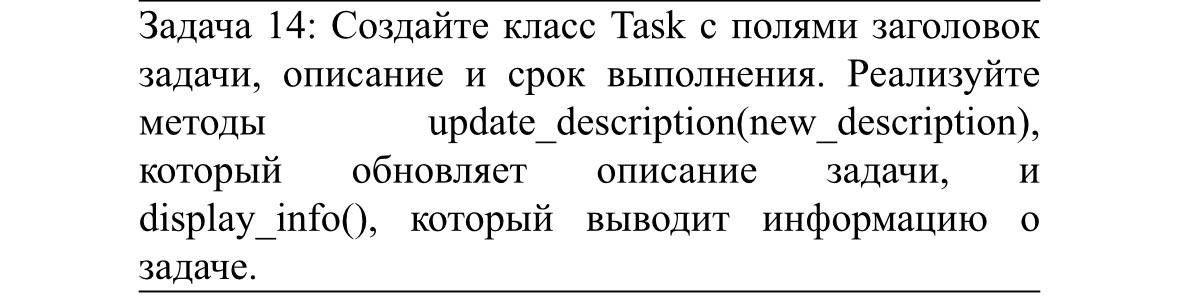

In [1]:
class Task:
    def __init__(self, title, description, due_date):
        self.title = title
        self.description = description
        self.due_date = due_date

    def update_description(self, new_description):
        self.description = new_description

    def display_info(self):
        print(f"Заголовок задачи: {self.title}")
        print(f"Описание: {self.description}")
        print(f"Срок выполнения: {self.due_date}")


# Пример использования класса
task = Task(
    title="Завершить проект",
    description="Написать код и протестировать",
    due_date="2023-12-31"
)

task.display_info()
print("\nОбновление описания...\n")
task.update_description("Написать код, протестировать и отправить на проверку")
task.display_info()

Заголовок задачи: Завершить проект
Описание: Написать код и протестировать
Срок выполнения: 2023-12-31

Обновление описания...

Заголовок задачи: Завершить проект
Описание: Написать код, протестировать и отправить на проверку
Срок выполнения: 2023-12-31


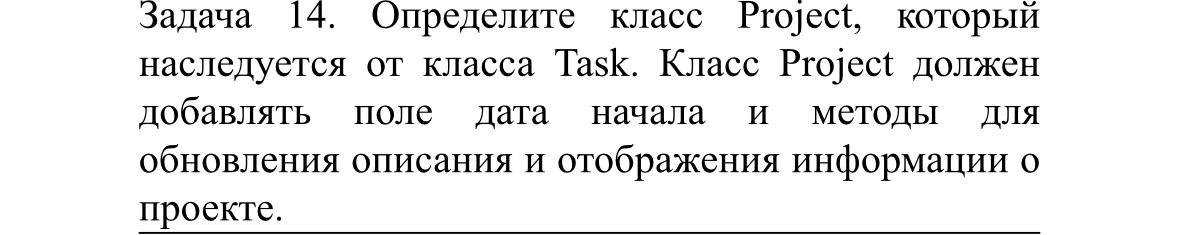

In [ ]:
class Task:
    def __init__(self, title, description, due_date):
        self.title = title
        self.description = description
        self.due_date = due_date

    def update_description(self, new_description):
        self.description = new_description

    def display_info(self):
        print(f"Заголовок задачи: {self.title}")
        print(f"Описание: {self.description}")
        print(f"Срок выполнения: {self.due_date}")


class Project(Task):
    def __init__(self, title, description, due_date, start_date):
        super().__init__(title, description, due_date)
        self.start_date = start_date

    def update_description(self, new_description):
        super().update_description(new_description)

    def display_info(self):
        super().display_info()
        print(f"Дата начала: {self.start_date}")


# Пример использования класса Project
project = Project(
    title="Разработка сайта",
    description="Создать лендинг для компании",
    due_date="2024-06-30",
    start_date="2024-01-15"
)

project.display_info()
print("\nОбновление описания...\n")
project.update_description("Создать лендинг и добавить форму обратной связи")
project.display_info()

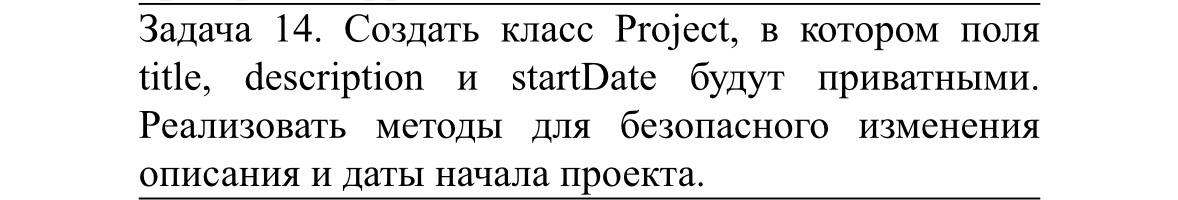

In [ ]:
class Project:
    def __init__(self, title, description, start_date):
        self.__title = title
        self.__description = description
        self.__start_date = start_date

    # Геттеры для приватных полей
    def get_title(self):
        return self.__title

    def get_description(self):
        return self.__description

    def get_start_date(self):
        return self.__start_date

    # Сеттеры для безопасного изменения полей
    def update_description(self, new_description):
        if isinstance(new_description, str) and new_description.strip():
            self.__description = new_description
        else:
            print("Ошибка: Описание должно быть непустой строкой")

    def update_start_date(self, new_start_date):
        if isinstance(new_start_date, str) and new_start_date.strip():
            self.__start_date = new_start_date
        else:
            print("Ошибка: Дата начала должна быть непустой строкой")

    def display_info(self):
        print(f"Название проекта: {self.__title}")
        print(f"Описание: {self.__description}")
        print(f"Дата начала: {self.__start_date}")


# Пример использования класса
project = Project(
    title="Разработка мобильного приложения",
    description="Создать кроссплатформенное приложение",
    start_date="2024-02-01"
)

project.display_info()

print("\nПопытка обновления данных...")
project.update_description("Создать кроссплатформенное приложение с использованием Flutter")
project.update_start_date("2024-02-15")
project.display_info()

print("\nПопытка некорректного обновления...")
project.update_description("")  # Пустое описание
project.update_start_date(12345)  # Не строка
project.display_info()  # Данные остались прежними

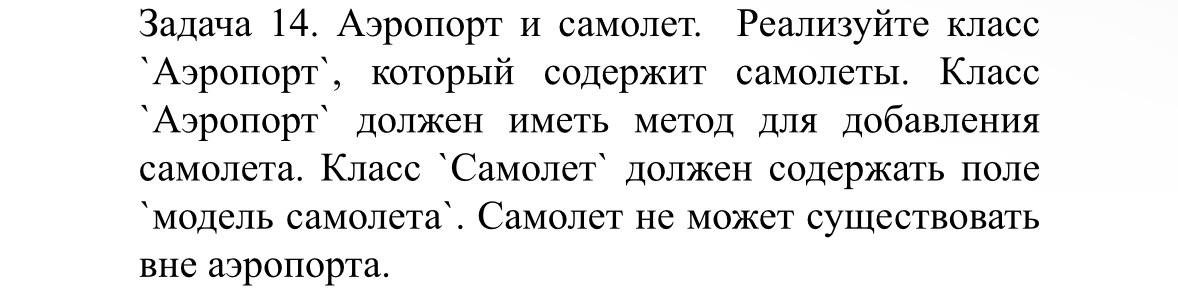

In [ ]:
class Airport:
    def __init__(self, name):
        self.name = name
        self.__airplanes = []  # Приватный список самолетов

    def add_airplane(self, airplane):
        if isinstance(airplane, Airplane):
            self.__airplanes.append(airplane)
            airplane.set_airport(self)  # Устанавливаем связь с аэропортом
        else:
            print("Ошибка: Можно добавить только объект класса Airplane")

    def remove_airplane(self, airplane):
        if airplane in self.__airplanes:
            self.__airplanes.remove(airplane)
            airplane.set_airport(None)  # Разрываем связь с аэропортом

    def get_airplanes(self):
        return self.__airplanes.copy()  # Возвращаем копию для защиты от изменений

    def display_info(self):
        print(f"Аэропорт: {self.name}")
        print("Самолеты в аэропорту:")
        for airplane in self.__airplanes:
            print(f"- {airplane.model}")


class Airplane:
    def __init__(self, model, airport=None):
        self.model = model
        self.__airport = None  # Приватное поле для хранения аэропорта
        if airport is not None:
            airport.add_airplane(self)

    def set_airport(self, airport):
        if airport is None or isinstance(airport, Airport):
            # Сначала удаляем из старого аэропорта
            if self.__airport is not None:
                self.__airport.remove_airplane(self)
            # Затем устанавливаем новый аэропорт
            self.__airport = airport
        else:
            print("Ошибка: Можно установить только объект класса Airport или None")

    def get_airport(self):
        return self.__airport


# Пример использования
sheremetyevo = Airport("Шереметьево")

# Создаем самолет и сразу добавляем в аэропорт
boeing = Airplane("Boeing 737", sheremetyevo)

# Создаем самолет без аэропорта и добавляем позже
airbus = Airplane("Airbus A320")
sheremetyevo.add_airplane(airbus)

# Выводим информацию об аэропорте
sheremetyevo.display_info()

print("\nУдаляем Boeing из аэропорта...")
sheremetyevo.remove_airplane(boeing)
sheremetyevo.display_info()

print("\nИнформация о Boeing:")
print(f"Модель: {boeing.model}")
print(f"Находится в аэропорту: {boeing.get_airport().name if boeing.get_airport() else 'Нет'}")

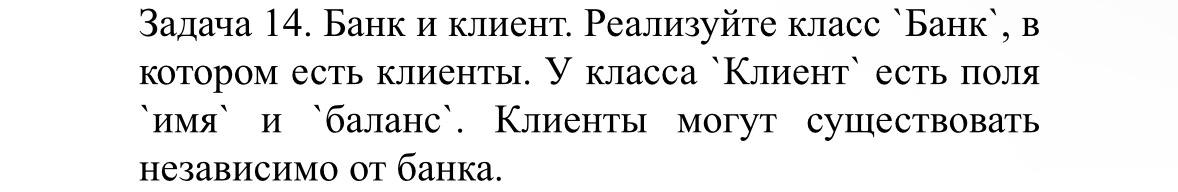

In [ ]:
class Bank:
    def __init__(self, name):
        self.name = name
        self.clients = []

    def add_client(self, client):
        if isinstance(client, Client):
            if client not in self.clients:
                self.clients.append(client)
                print(f"Клиент {client.name} добавлен в банк {self.name}")
            else:
                print(f"Клиент {client.name} уже есть в банке {self.name}")
        else:
            print("Ошибка: Можно добавить только объект класса Client")

    def remove_client(self, client):
        if client in self.clients:
            self.clients.remove(client)
            print(f"Клиент {client.name} удален из банка {self.name}")
        else:
            print(f"Клиент {client.name} не найден в банке {self.name}")

    def display_clients(self):
        print(f"\nКлиенты банка {self.name}:")
        if not self.clients:
            print("Нет клиентов")
        else:
            for client in self.clients:
                print(f"- {client.name}: баланс {client.balance} руб.")

    def total_balance(self):
        return sum(client.balance for client in self.clients)


class Client:
    def __init__(self, name, balance=0):
        self.name = name
        self.balance = balance

    def deposit(self, amount):
        if amount > 0:
            self.balance += amount
            print(f"Депозит на {amount} руб. успешен. Новый баланс: {self.balance} руб.")
        else:
            print("Ошибка: Сумма депозита должна быть положительной")

    def withdraw(self, amount):
        if 0 < amount <= self.balance:
            self.balance -= amount
            print(f"Снятие {amount} руб. успешно. Новый баланс: {self.balance} руб.")
        else:
            print("Ошибка: Недостаточно средств или неверная сумма")

    def transfer(self, other_client, amount):
        if self.balance >= amount > 0:
            self.balance -= amount
            other_client.balance += amount
            print(f"Перевод {amount} руб. клиенту {other_client.name} выполнен")
        else:
            print("Ошибка: Недостаточно средств или неверная сумма")


# Пример использования
sberbank = Bank("Сбербанк")
tinkoff = Bank("Тинькофф")

# Создаем клиентов
alice = Client("Алиса", 5000)
bob = Client("Боб", 3000)
carol = Client("Каролина", 10000)

# Добавляем клиентов в банки
sberbank.add_client(alice)
sberbank.add_client(bob)
tinkoff.add_client(carol)

# Операции клиентов
alice.deposit(2000)
bob.withdraw(500)
carol.transfer(alice, 3000)

# Выводим информацию
sberbank.display_clients()
tinkoff.display_clients()

print(f"\nОбщий баланс Сбербанка: {sberbank.total_balance()} руб.")
print(f"Общий баланс Тинькоффа: {tinkoff.total_balance()} руб.")

# Удаляем клиента
sberbank.remove_client(bob)
sberbank.display_clients()

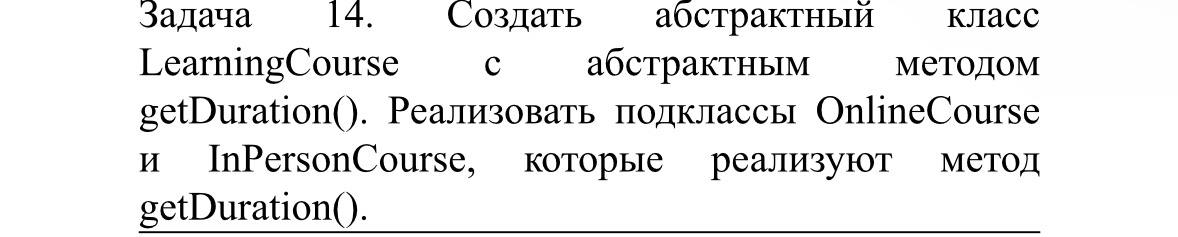

In [ ]:
from abc import ABC, abstractmethod

class LearningCourse(ABC):
    def __init__(self, title):
        self.title = title

    @abstractmethod
    def getDuration(self):
        pass



class OnlineCourse(LearningCourse):
    def __init__(self, title, weeks, hours_per_week):
        super().__init__(title)
        self.weeks = weeks
        self.hours_per_week = hours_per_week

    def getDuration(self):
        total_hours = self.weeks * self.hours_per_week
        return f"Онлайн-курс '{self.title}': {self.weeks} недель(и), {total_hours} часов всего"


class InPersonCourse(LearningCourse):
    def __init__(self, title, days, hours_per_day):
        super().__init__(title)
        self.days = days
        self.hours_per_day = hours_per_day

    def getDuration(self):
        total_hours = self.days * self.hours_per_day
        return f"Очный курс '{self.title}': {self.days} дней, {total_hours} часов всего"


# Пример использования
python_online = OnlineCourse("Программирование на Python", weeks=8, hours_per_week=6)
design_in_person = InPersonCourse("Дизайн интерфейсов", days=5, hours_per_day=8)

print(python_online.getDuration())
print(design_in_person.getDuration())

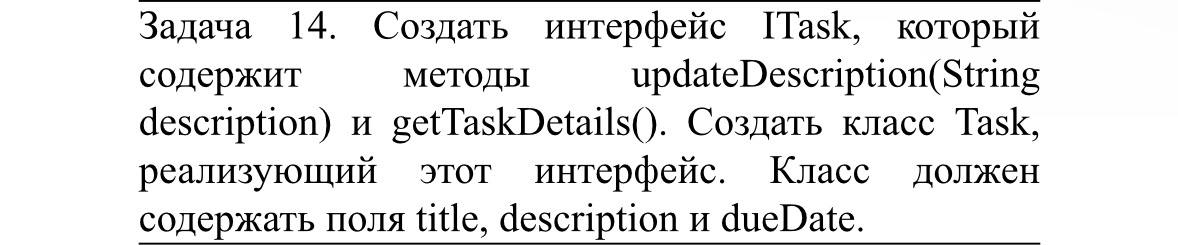

In [ ]:
from abc import ABC, abstractmethod


class ITask(ABC):
    @abstractmethod
    def updateDescription(self, description):
        pass

    @abstractmethod
    def getTaskDetails(self):
        pass



class Task(ITask):
    def __init__(self, title, description, dueDate):
        self.title = title
        self.description = description
        self.dueDate = dueDate

    def updateDescription(self, new_description):
        if isinstance(new_description, str) and new_description.strip():
            self.description = new_description
        else:
            print("Ошибка: Описание должно быть непустой строкой")

    def getTaskDetails(self):
        return {
            'title': self.title,
            'description': self.description,
            'dueDate': self.dueDate
        }


    def displayTaskInfo(self):
        details = self.getTaskDetails()
        print(f"Задача: {details['title']}")
        print(f"Описание: {details['description']}")
        print(f"Срок выполнения: {details['dueDate']}")


# Пример использования
task = Task(
    title="Завершить проект",
    description="Написать финальный отчет",
    dueDate="2023-12-31"
)


task.displayTaskInfo()
print("\nОбновляем описание задачи...")
task.updateDescription("Написать финальный отчет и проверить тесты")
task.displayTaskInfo()

print("\nПопытка установить пустое описание...")
task.updateDescription("")
task.displayTaskInfo()  # Описание останется прежним

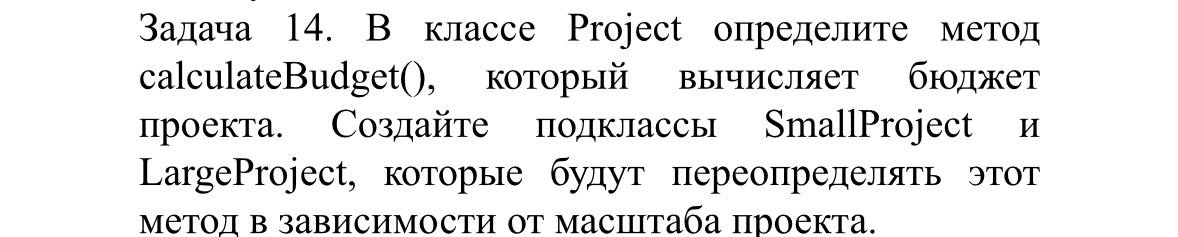

In [ ]:
class Project:
    def __init__(self, name, team_size, duration_months):
        self.name = name
        self.team_size = team_size
        self.duration_months = duration_months

    def calculateBudget(self):
        # Базовый расчет бюджета (может быть переопределен в подклассах)
        return self.team_size * self.duration_months * 5000  # 5000 - базовая ставка


class SmallProject(Project):
    def calculateBudget(self):
        # Для малых проектов применяем понижающий коэффициент
        base_budget = super().calculateBudget()
        return base_budget * 0.8  # 20% скидка на малые проекты


class LargeProject(Project):
    def calculateBudget(self):
        # Для крупных проектов применяем повышающий коэффициент
        base_budget = super().calculateBudget()
        return base_budget * 1.5  # 50% надбавка на крупные проекты


# Пример использования
small_website = SmallProject("Корпоративный сайт", team_size=3, duration_months=2)
large_platform = LargeProject("Торговая платформа", team_size=10, duration_months=6)

print(f"Бюджет малого проекта '{small_website.name}': ${small_website.calculateBudget():,.2f}")
print(f"Бюджет крупного проекта '{large_platform.name}': ${large_platform.calculateBudget():,.2f}")

Артур Гузаиров 09-313